## Seaborn

Seaborn es una libreria de visualización de datos basada en matplotlib  
Interface de alto nivel para realizar gráficos estadísticos  

        conda install seaborn  

        pip install seaborn  

In [54]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [55]:
propinas = sns.load_dataset('tips')  #cargarmos el dataset tips que viene de ejemplo para pruebas en sns

In [56]:
propinas.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<Axes: xlabel='total_bill', ylabel='Density'>

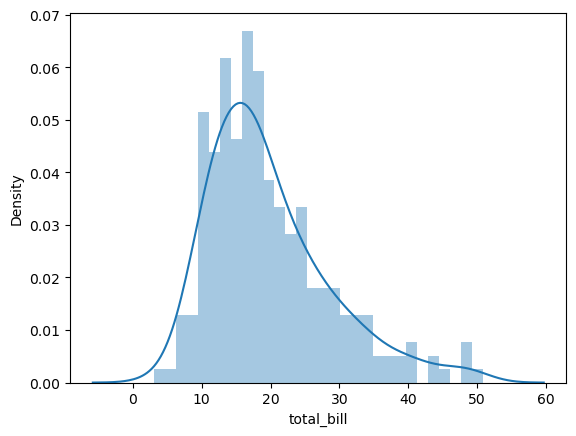

In [57]:
#Histograma

sns.distplot(propinas['total_bill'], bins=30)

<Axes: xlabel='tip', ylabel='Density'>

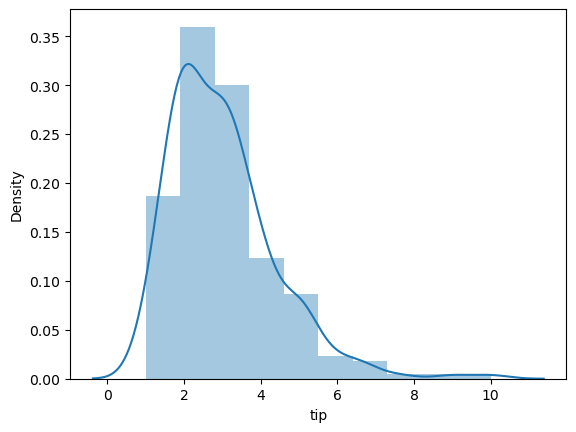

In [58]:
sns.distplot(propinas['tip'], bins=10)

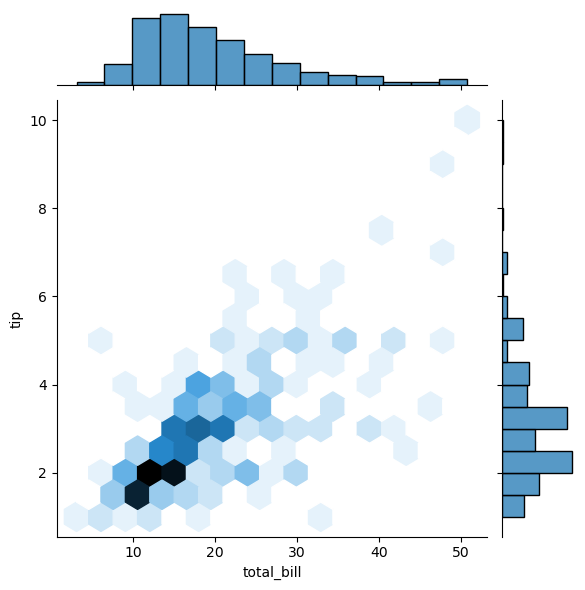

In [59]:
sns.jointplot(x='total_bill', y='tip', data=propinas, kind='hex')

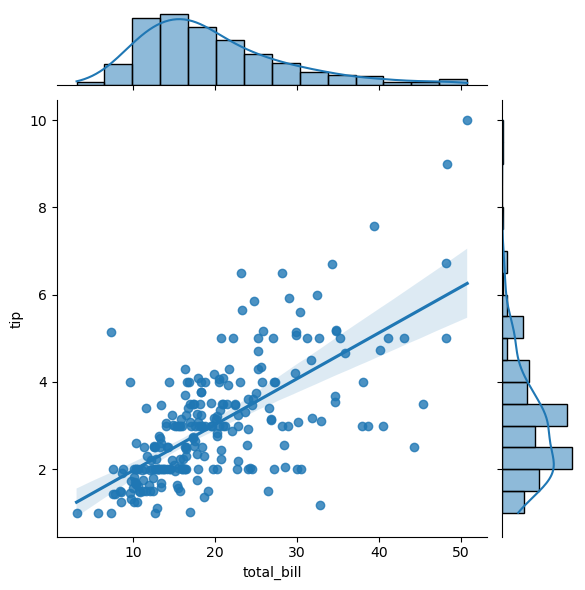

In [60]:
sns.jointplot(x='total_bill', y='tip', data=propinas, kind='reg')  #muestra la distribución lineal

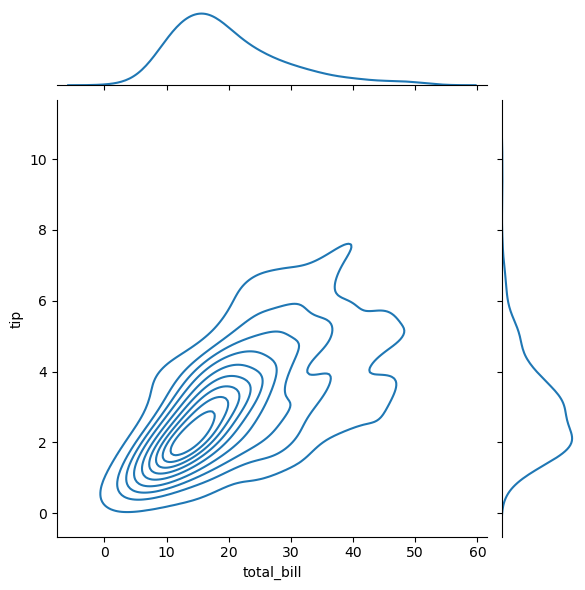

In [61]:
sns.jointplot(x='total_bill', y='tip', data=propinas, kind='kde')  

In [62]:
#si queremos comparar todas las columnas numéricas

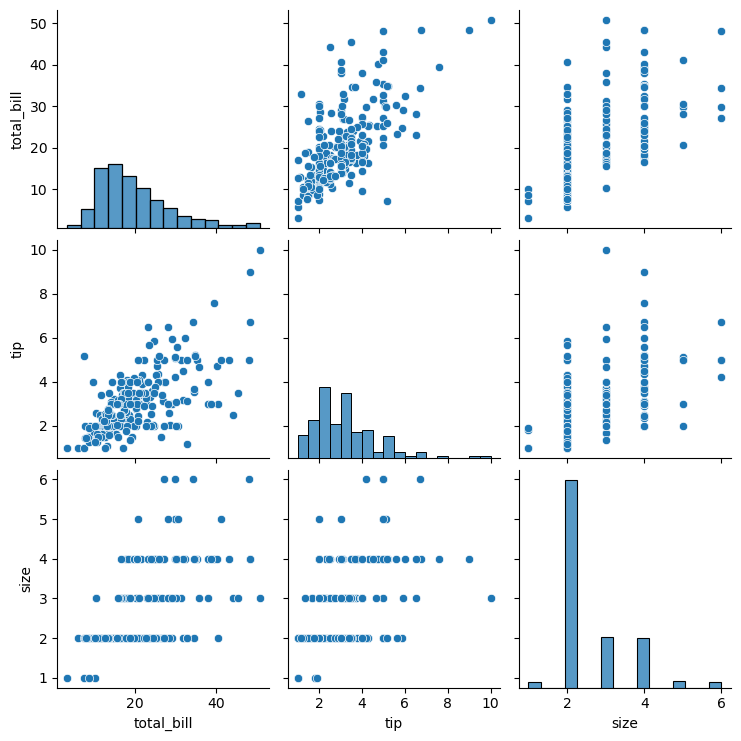

In [63]:
sns.pairplot(propinas)  #lo hace automático y compara 2 a 2

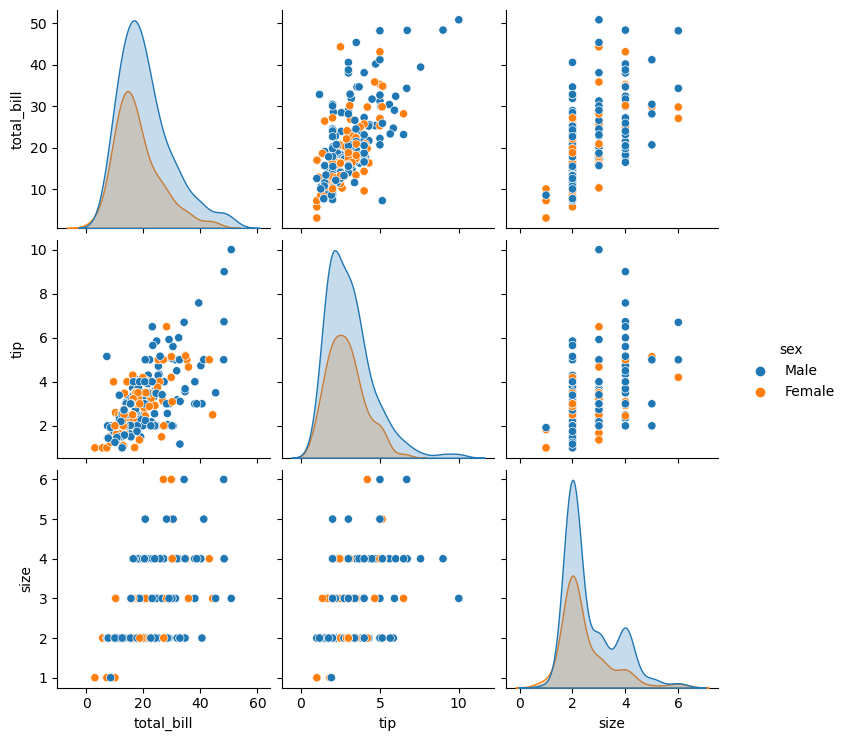

In [64]:
sns.pairplot(propinas, hue='sex') #separa los datos en funcion de la categoria 'sex'

In [65]:
#otro tipo de graficos- rugplot
sns.rugplot(propinas['size
'])

SyntaxError: unterminated string literal (detected at line 2) (346469038.py, line 2)

In [ ]:
#Gráficos para columnas de tipo categoría

In [ ]:
sns.barplot(x='sex', y ='total_bill',data = propinas)

In [ ]:
sns.countplot(x='sex', data=propinas)  #esto sirve para columnas de tipo categoría

In [ ]:
#comparar una columna de categoria con una categoria no numérica

In [ ]:
sns.boxplot(x='day', y='total_bill', data=propinas)

In [ ]:
sns.boxplot(x='day', y='total_bill', data=propinas, hue='smoker')

In [ ]:
#violin plot
sns.violinplot(x='day', y='total_bill', data=propinas, hue='smoker', split=True)

In [ ]:
sns.stripplot(x='day', y='total_bill', data=propinas, hue='sex')

In [ ]:
sns.swarmplot(x='day', y='total_bill', data=propinas, hue='sex')  #igual pero los puntos no se solapan

In [ ]:
#juntas varios gráficos

In [ ]:
sns.violinplot(x='day', y='total_bill', data=propinas)
sns.swarmplot(x='day', y='total_bill', data=propinas)

# mapas de calor

In [ ]:
vuelos = sns.load_dataset('flights')  #cargmos el dataset incluido en sns para pruebas

In [ ]:
vuelos.head(5)

In [ ]:
#para usar un mapa de calor tenemos que tener la tabla en formato matrix
#le damos formato a la tabla
vuelos_matriz=vuelos.pivot_table(index='month', columns='year', values='passengers')
vuelos_matriz

In [ ]:
#creamos el mapa de calor
sns.heatmap(vuelos_matriz)

In [ ]:
sns.heatmap(vuelos_matriz, cmap='viridis')

In [ ]:
sns.heatmap(vuelos_matriz, cmap='coolwarm', linecolor='white', linewidths=2)

# Gráficos de Cuadrícula o Grids

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
flores = sns.load_dataset('iris')
flores

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


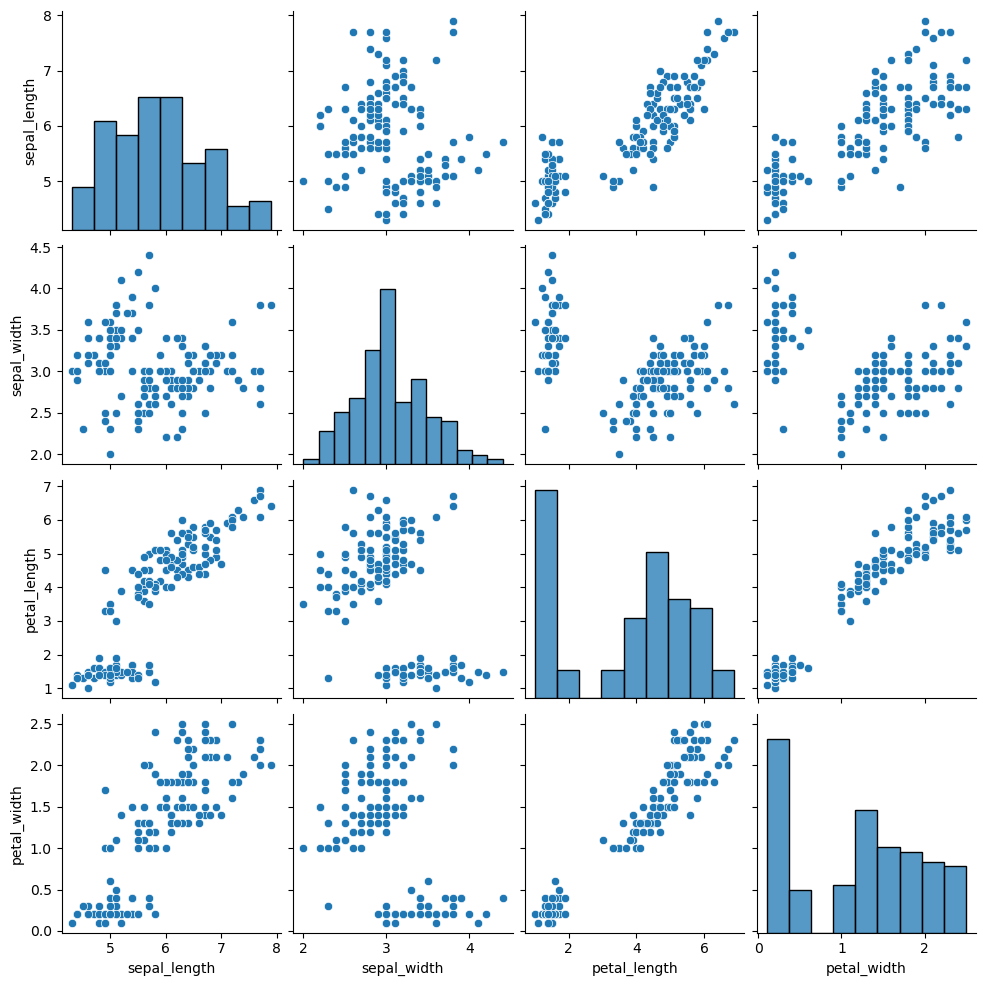

In [89]:
sns.pairplot(flores)

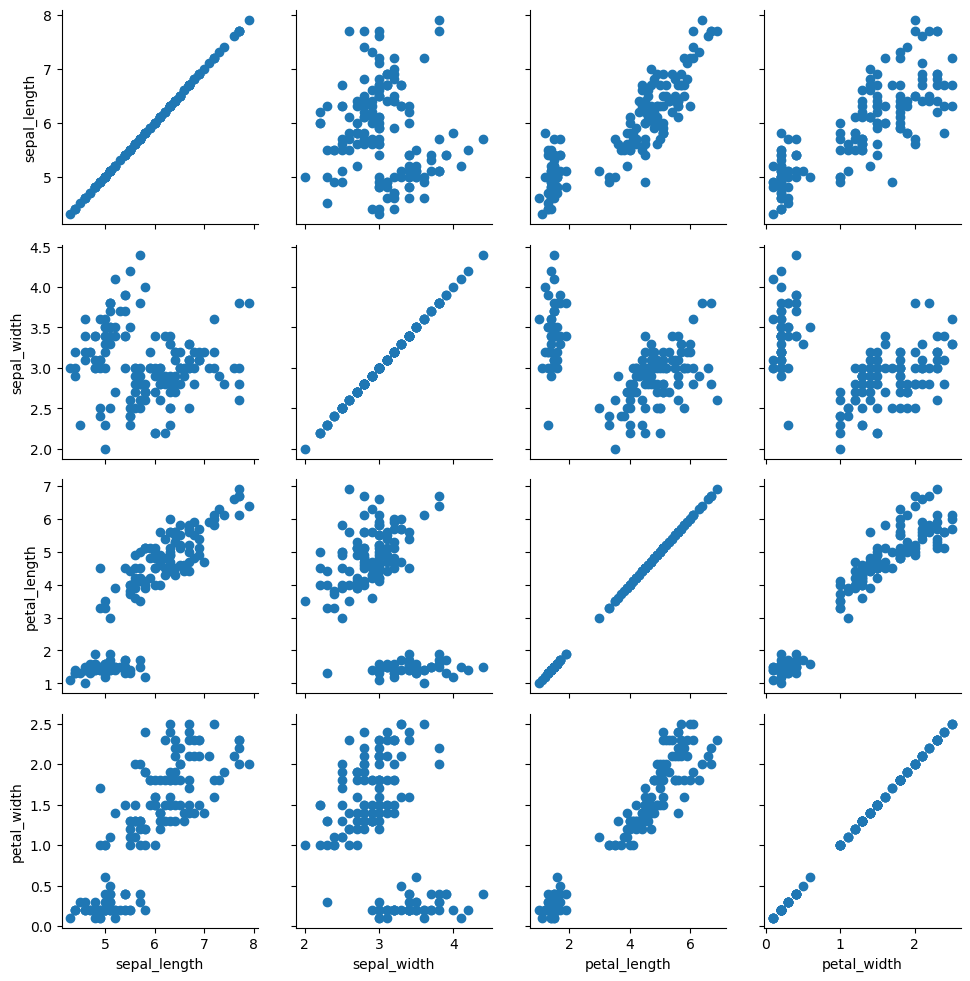

In [92]:
graficos = sns.PairGrid(flores)
graficos.map(plt.scatter)  #rellena el grid con graficos de tipo scatter

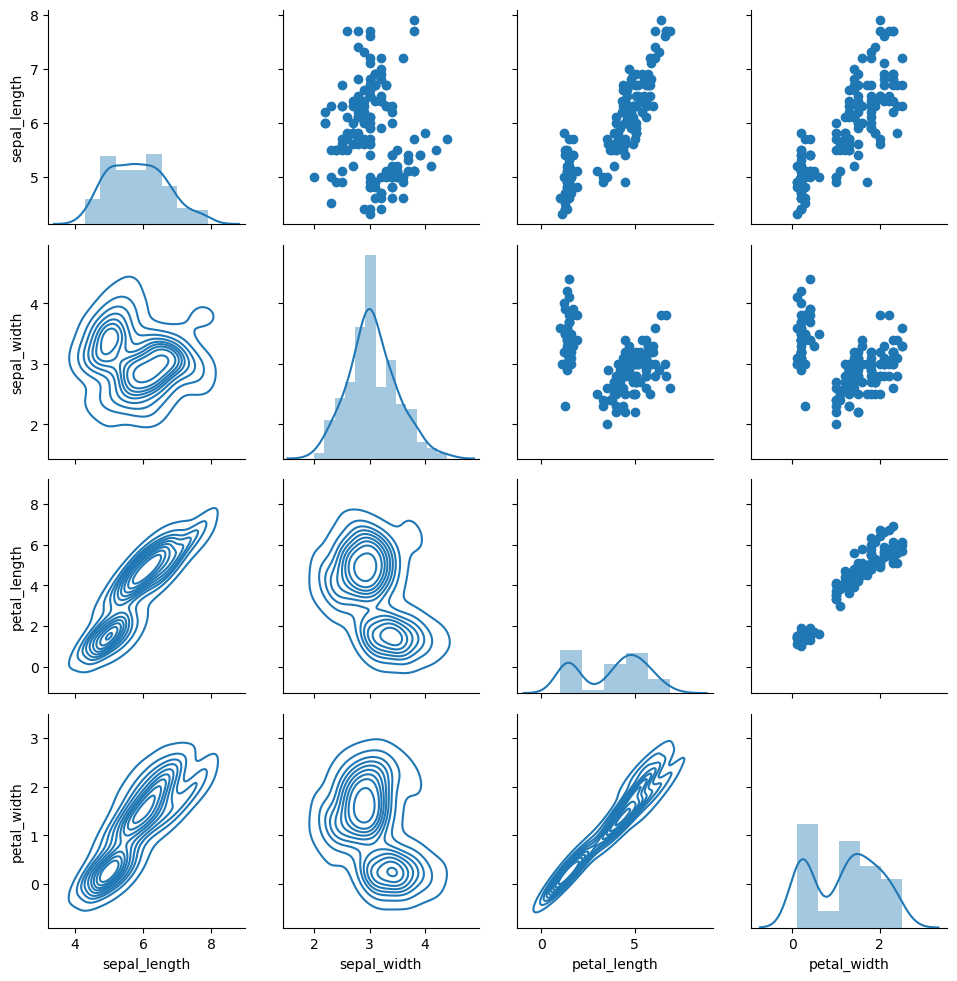

In [96]:
graficos = sns.PairGrid(flores)
graficos.map_diag(sns.distplot)  #le indicamos que queremos en la diagonal
graficos.map_upper(plt.scatter)  #por encima de la diagonal
graficos.map_lower(sns.kdeplot)

In [98]:
propinas = sns.load_dataset('tips')
propinas.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [99]:
#ver cuantos eltos diferentes hay en una columna
propinas['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

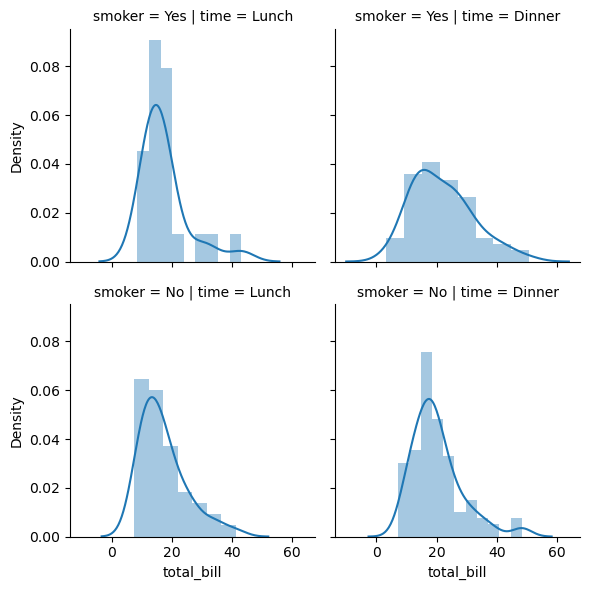

In [81]:
#Haceruna FacetGrid con el eje siempre x = 'total_bill' y sacando un grafico para cada dato en 'time' y 'smoker'
graficos2 = sns.FacetGrid(data=propinas, col='time', row='smoker')
graficos2.map(sns.distplot,'total_bill')

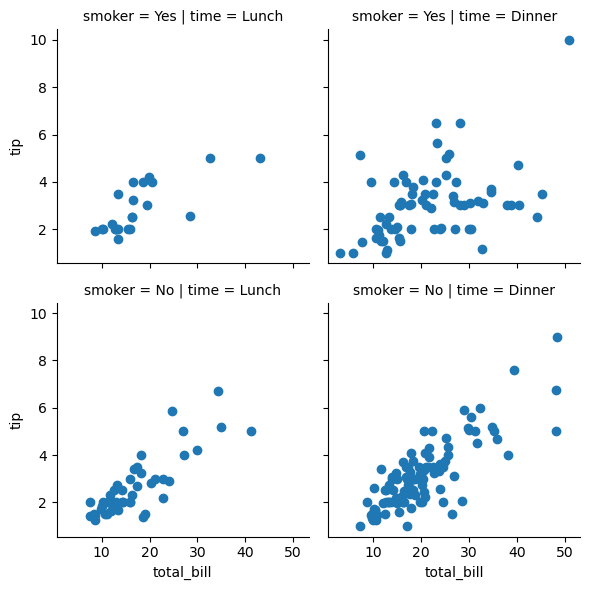

In [107]:
graficos2 = sns.FacetGrid(data=propinas, col='time', row='smoker')
graficos2.map(plt.scatter,'total_bill', 'tip')

# Gráficos de Regresión (Regression Plots)

In [1]:
import seaborn as sns
propinas = sns.load_dataset('tips')
propinas.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


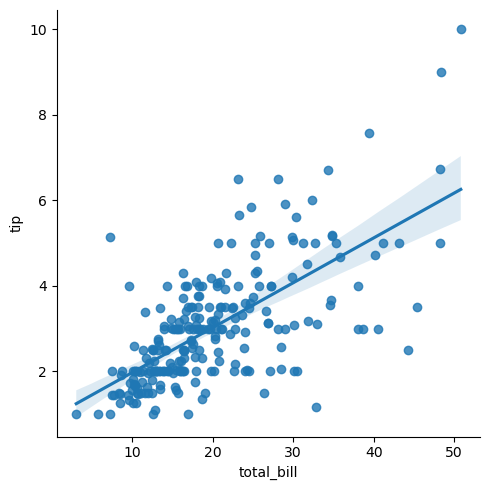

In [2]:
sns.lmplot(x='total_bill', y='tip', data=propinas)
#genera tambien una línea de ajuste 

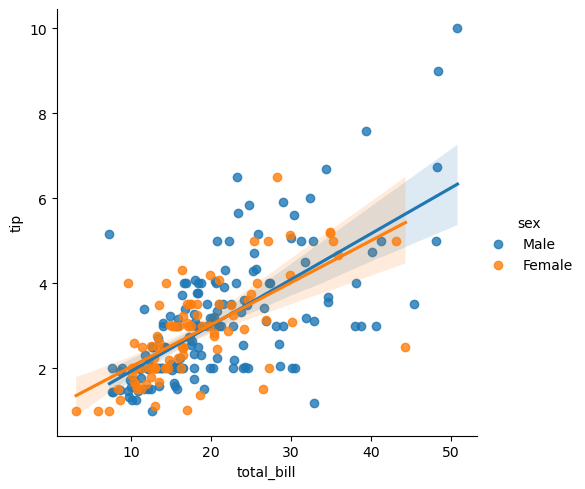

In [5]:
sns.lmplot(x='total_bill', y='tip', data=propinas, hue='sex')
#con discriminación de los datos por la columna sex

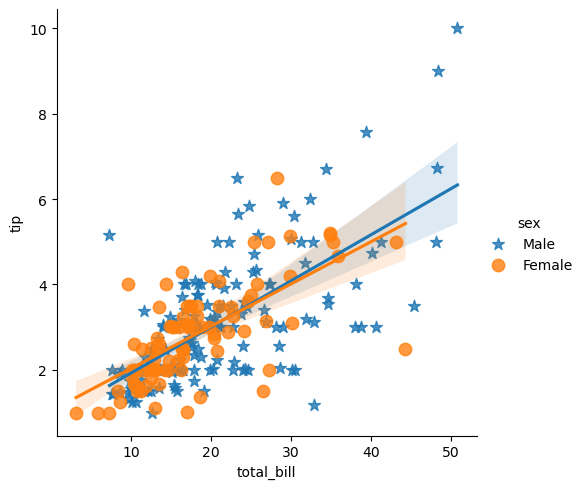

In [7]:
sns.lmplot(x='total_bill', y='tip', data=propinas, hue='sex', markers=['*','o'], scatter_kws={'s':80})


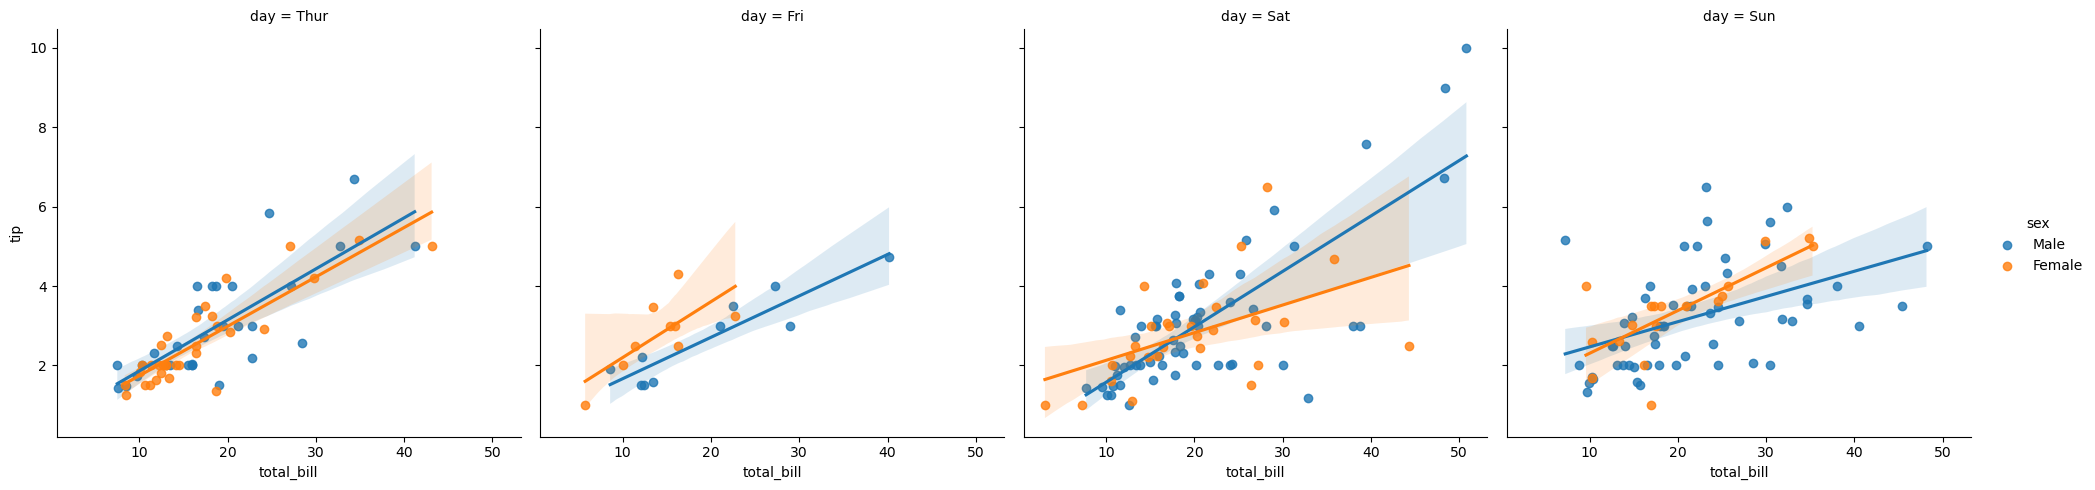

In [15]:
#añadir columnas
sns.lmplot(x='total_bill', y='tip', data=propinas, hue='sex',col='day')

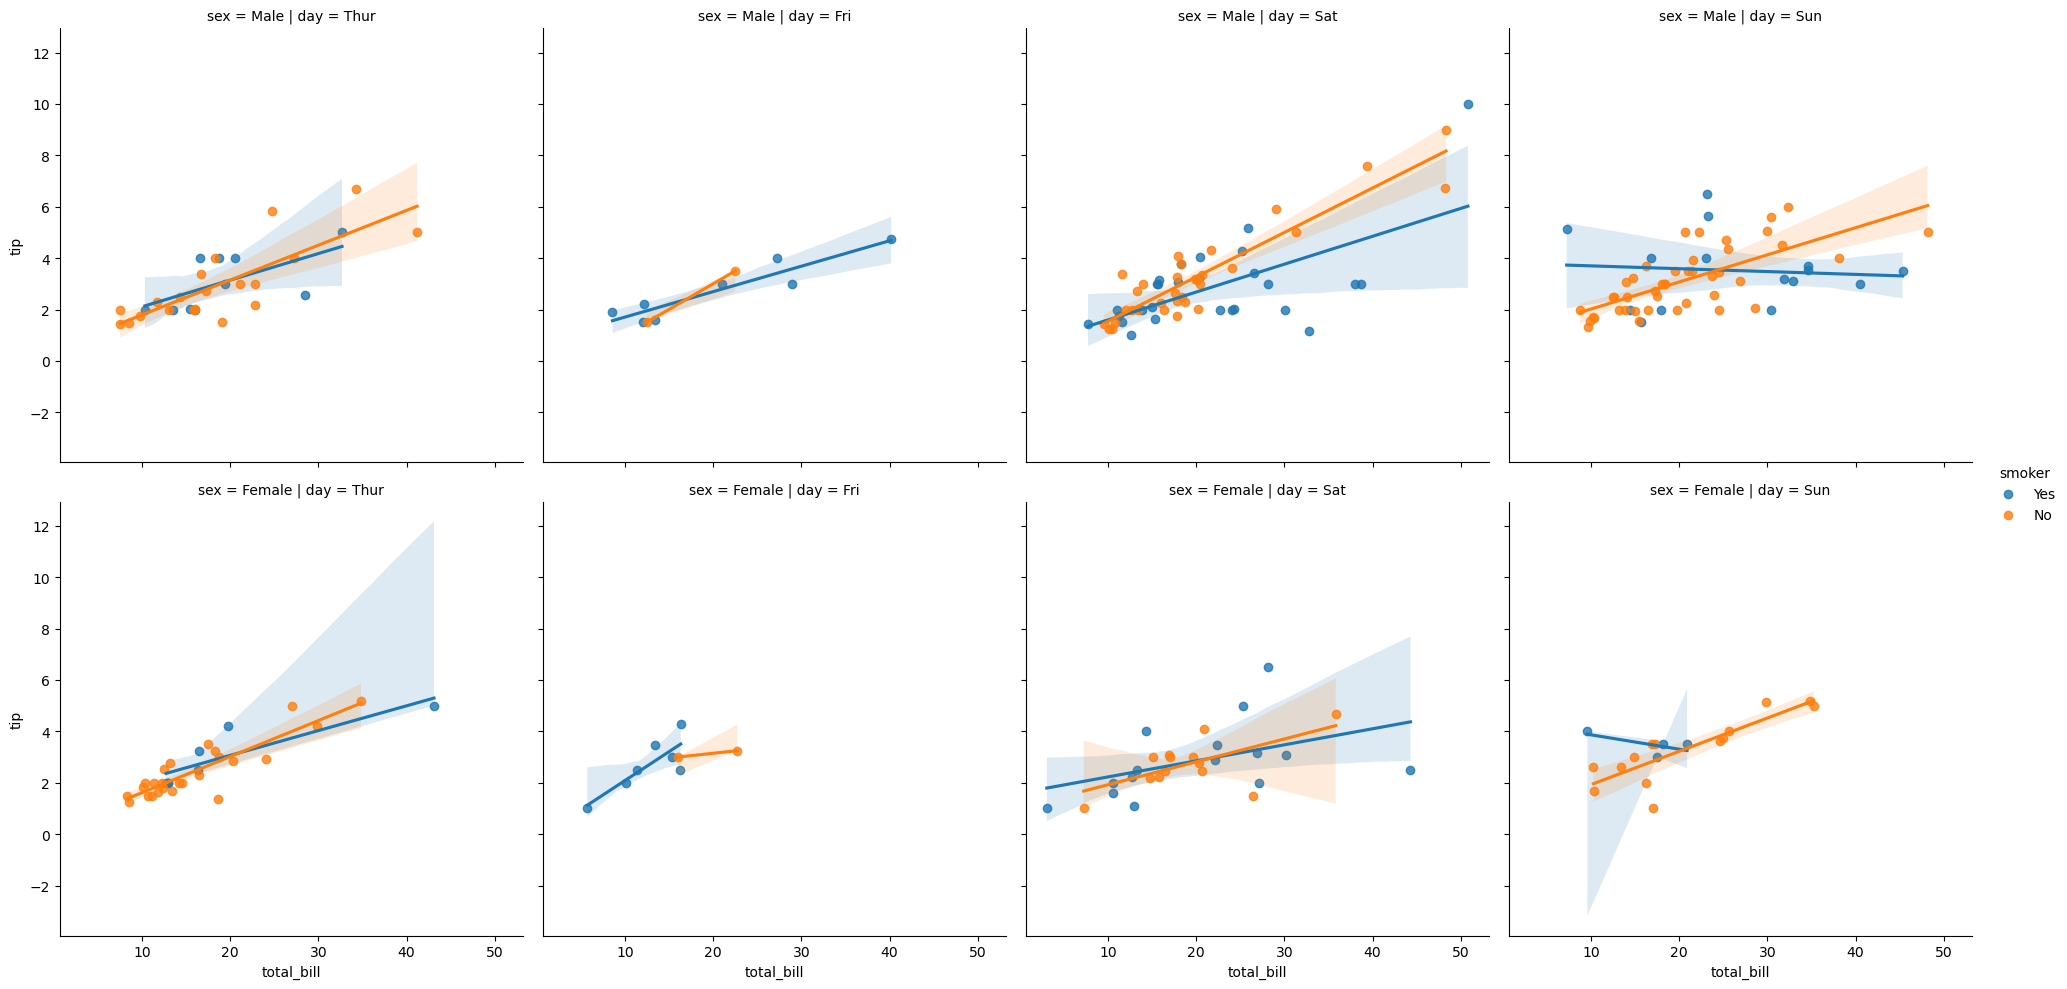

In [21]:
sns.lmplot(x='total_bill', y='tip', data=propinas, col='day', row='sex', hue='smoker')

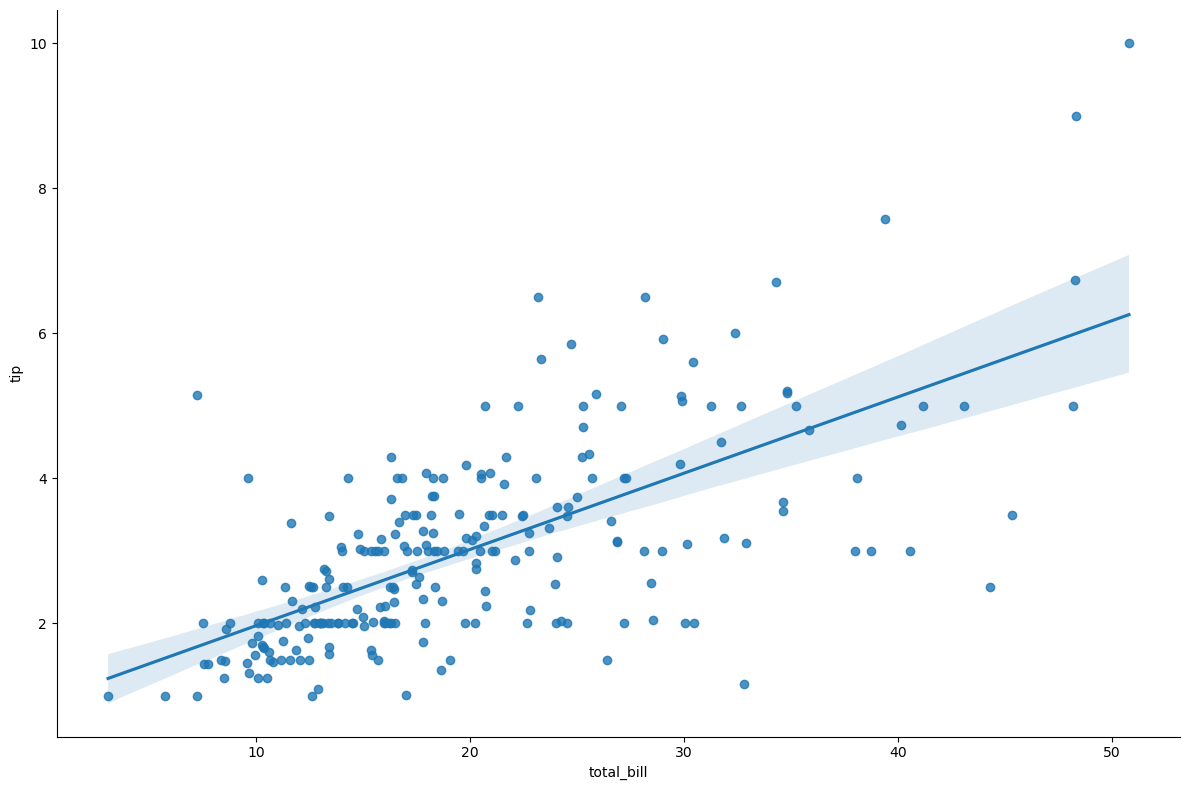

In [33]:
sns.lmplot(x='total_bill', y='tip',data=propinas, aspect=1.5, height=8 ) #size se cambia con height

### estilos y colores

In [55]:
import matplotlib.pyplot as plt

C:\Users\CPU\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


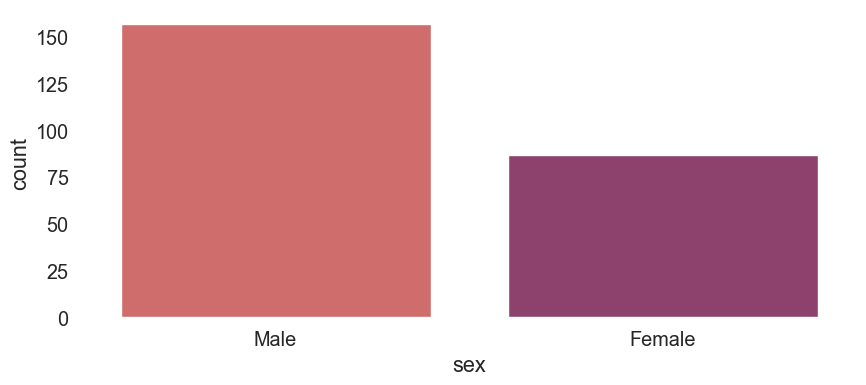

In [83]:
sns.set_context('notebook', font_scale=1.3)  #cambia el tamño y stylo fuente de las letras
plt.figure(figsize=(10,4))  #cambia el tamaño de la figura
sns.set_style('white')  #aquí le indicamos los cambios, se ven estilos con shift+tab
sns.countplot(x='sex', data=propinas, palette='flare')
sns.despine(left=True,bottom=True)   #quita las barras laterales

C:\Users\CPU\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='sex', ylabel='count'>

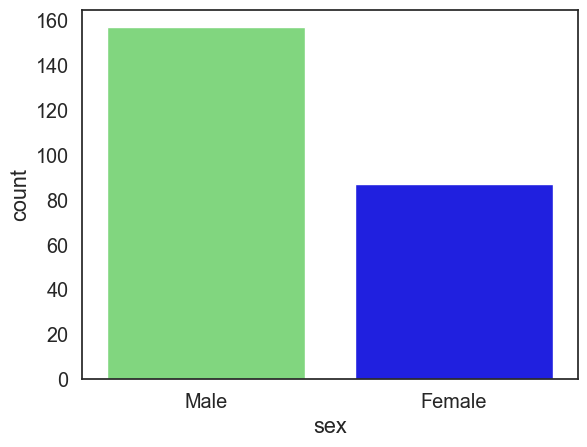

In [89]:
#definir nosotros los colores
#primero definimos una variable de colores, valen tanto hexadecimal como nombres

colores= ['#73e470','blue']
sns.countplot(x='sex', data=propinas, palette=colores)